In [303]:
import pandas as pd
import numpy as np

First I use the two functions given on the website of Amazon review data to parse the json data

In [304]:
def parse(path):
    readin = open(path, 'rb')
    for l in readin:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [305]:
df_meta = getDF('C:/Users/cathy/OneDrive/Documents/spring_board/meta_Health_and_Personal_Care.json')

Let's take a look at the data

In [306]:
df_meta.head(5)

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0077614992,This is an example product description.,Principles of Mgmt + Oper-CSUF Custom C,http://ecx.images-amazon.com/images/I/51G%2BRq...,"{'also_bought': ['0471730726', '0132834871', '...",{'Health & Personal Care': 168429},[[Health & Personal Care]],NaN,NaN
1,0615208479,By now we all know the benefits of exercise fo...,Brain Fitness Exercises Software,http://ecx.images-amazon.com/images/I/41kbZB04...,NaN,{'Health & Personal Care': 1346973},"[[Health & Personal Care, Personal Care]]",NaN,NaN
2,0615269990,What's wrong with your patient?Do all the symp...,Occam's Razor,http://ecx.images-amazon.com/images/I/51fH-ABe...,"{'also_bought': ['1935660152', '0071743979', '...",{'Toys & Games': 110575},"[[Health & Personal Care, Personal Care, Shavi...",34.99,NaN
3,0615315860,NaN,101 BlenderBottle Recipes Quick and Easy,http://ecx.images-amazon.com/images/I/21zOQu2Q...,"{'also_bought': ['B006VT9RBM', 'B0010JLMO8', '...",{'Health & Personal Care': 254068},[[Health & Personal Care]],NaN,NaN
4,0615406394,This is an example product description.,"Aphrodite Reborn - Women's Stories of Hope, Co...",http://ecx.images-amazon.com/images/I/51rJLgsi...,"{'also_bought': ['0966035232', '1421407205']}",{'Health & Personal Care': 377936},[[Health & Personal Care]],NaN,NaN


In [325]:
df_meta.iloc[10]['categories']

['Health & Personal Care',
 'Stationery & Party Supplies',
 'Stationery',
 'Fine Writing Instruments']

The meta dataset provides information of each product in the Health care and personal care department on Amazon. Each is for a specific product and each column provides one aspect of the products:
    - 'asin' is the product unique ID. 
    - "description" gives a brief discription of the product: its function, ingredients etc. 
    - 'related" lists what other products that users who bought this product also bought. 
    - 'salesRank' gives the rank of the sale amount of product. 
    - "categories" shows the category that a product is assigned. It can be multiple values.
    - 'price' and 'brand', are self-explaintory as shown by their name. 
   


Let's see the how many products in this department. 

In [307]:
print (df_meta.shape[0])

263032


There are more than 260000 products! How about the number of category? 

In [308]:
print (df_meta.categories[:20])

0                            [[Health & Personal Care]]
1             [[Health & Personal Care, Personal Care]]
2     [[Health & Personal Care, Personal Care, Shavi...
3                            [[Health & Personal Care]]
4                            [[Health & Personal Care]]
5                            [[Health & Personal Care]]
6     [[Health & Personal Care, Personal Care, Eye C...
7     [[Health & Personal Care, Medical Supplies & E...
8     [[Health & Personal Care, Medical Supplies & E...
9     [[Health & Personal Care, Stationery & Party S...
10    [[Health & Personal Care, Stationery & Party S...
11    [[Health & Personal Care, Stationery & Party S...
12    [[Health & Personal Care, Stationery & Party S...
13    [[Health & Personal Care, Stationery & Party S...
14                           [[Health & Personal Care]]
15    [[Health & Personal Care, Stationery & Party S...
16    [[Health & Personal Care, Stationery & Party S...
17    [[Health & Personal Care, Stationery & Par

It shows that the categories column is in the form of list of lists. I then further check the actual structure:

In [315]:
df_meta["categories"].apply(len).value_counts()

1     261235
2       1017
3        402
4        217
5        107
6         35
7         12
8          4
11         1
10         1
9          1
Name: categories, dtype: int64

It shows that the list of categories can be of length 1 or more. To make this structure more simple and easier to analyze, I flatten the list of lists to be a list of all categories that a product belongs to. 

For example: [['health care'], ['home', 'furniture']] --> ['health care', 'home', 'furniture'] 

In [316]:
# flatten a list of lists: extract all elements and reduce the dimention to one
def Flatten_lists(ll):
    mylist=ll[:]
    while any([type(l) is list for l in mylist]):
        flattened=list()
        for e in mylist:
            if type(e) is list:
                flattened.extend(e)
            else:
                flattened.append(e)
        mylist=flattened
    return (flattened)

Then I transform the 'categories' column into the form of one dimention list

In [317]:
df_meta['categories']=df_meta['categories'].apply(Flatten_lists)

Now take a look at the updated categories column (first 10 rows)

In [318]:
df_meta['categories'][:10]

0                             [Health & Personal Care]
1              [Health & Personal Care, Personal Care]
2    [Health & Personal Care, Personal Care, Shavin...
3                             [Health & Personal Care]
4                             [Health & Personal Care]
5                             [Health & Personal Care]
6    [Health & Personal Care, Personal Care, Eye Ca...
7    [Health & Personal Care, Medical Supplies & Eq...
8    [Health & Personal Care, Medical Supplies & Eq...
9    [Health & Personal Care, Stationery & Party Su...
Name: categories, dtype: object

All categories that a product belongs to are now stored in a single list

My next question is that how many unique categories are there? and how many unique combination of categories are there? 

In [227]:
allcategories=list(Flatten_lists((df_meta['categories'].tolist())))
print ("there are in total {} categories".format(len(set(allcategories))))

def List_sort_tuple(l):
    l.sort()
    return tuple(l)

print ("there are in total {} combinations of categories".format(len(set(df_meta['categories'].apply(lambda l:List_sort_tuple(l))))))

there are in total 1490 categories
there are in total 1805 combinations of categories


There are over 1400 subcategories and over 1800 combinations of them! If one wants to do sentiment analysis on products defined by these combinations, that would be a lot of work, let alone that some of the combination may only have a small number of products. 

Therefore, in the following steps, I try to summarize these products with distinct but fewer combinations, while making sure that products categorized under each combination have similar functions. For example, one of the product is under the combination of categories: 'Gift Wrap Paper', 'Gift Wrapping Supplies', 'Health & Personal Care' and 'Stationery & Party Supplies'. However, the combination of 'Health & Personal Care' and 'Stationery & Party Supplies' or 'Health & Personal Care' and 'Gift wrap paper' is already adequate to summarize this product, and one can be relatively confident that some other products under this same category share similar functions or similar features. 

The way I reduce the number of combined categories is to identify the most frequent ones and try to categorize each product using the combinations of two of these most frequent ones. Again, using the product with combined category: Gift Wrap Paper', 'Gift Wrapping Supplies', 'Health & Personal Care' and 'Stationery & Party Supplies' as an example: if 'Health & Personal Care' and 'Stationery & Party Supplies' are among the top frequent categories, I will choose the combination of these two to summarize this product. 

Also, by doing this I assume that combinations of two categories are informative enough to summarize a product. 

In [312]:
from collections import Counter
category_count=dict(Counter(allcategories))

def Top_frequent_category(x, category_count):
    key_values=list()
    for k in set(x):
        key_values.append((k,category_count[k]))
    
    key_values.sort(key=lambda tup: tup[1], reverse=True)
    exclude=['Health & Personal Care', 'Health Care', 'Personal Care']
    if len(key_values)>=2:
        subcategories=[tup[0] for tup in key_values if tup[0] not in exclude]
        if subcategories !=[]:
            category=subcategories[0]
        else:
            category=key_values[0][0]
    else:
        category=x[0]
    return (category)

In [319]:
df_meta['main_category']=df_meta['categories'].apply(lambda L:Top_frequent_category(L, category_count))

After the transformation, there are 41 categories


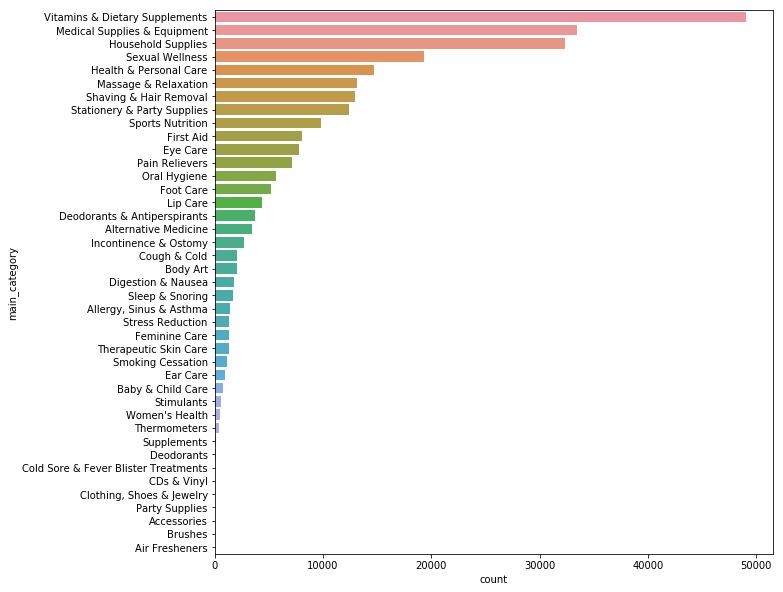

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

print ('After the transformation, there are {} categories'
          .format(len(df_meta['main_category'].value_counts().index)))
plt.figure(figsize=(10, 10))
sns.countplot(y='main_category', 
              data=df_meta,
              order = df_meta['main_category'].value_counts().index)
plt.show()

It shows that after downsizing and tranforming these categories, the products are now summarized into 41 categories, which is a huge reduction from its original 1805. The biggest category is 'Vitamines and Dietary Supplements', while the smallest category is 'Air Fresheners', the number of which is too small that it is hardly seen on the figure.

In this exercise I will first focus on one category: "Sleep & Snoring". I choose it because there is intermediate number of products in this category, which makes it possible that the analysis used for this category would fit the larger categories and smaller ones. 

In [321]:
df_sleep=df_meta[df_meta['main_category']=='Sleep & Snoring']

Then I download the review data, which I will later combine with the product metadata.

In [215]:
df_review = getDF('C:/Users/cathy/OneDrive/Documents/spring_board/Health_and_Personal_Care_5.json')

Let's take a look at the first few rows of review data

In [216]:
df_review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4.0,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4.0,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4.0,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5.0,Very nice and convenient.,1313452800,"08 16, 2011"


It shows that most columns are information relevant to the review: 
    - reviewerID: the reviewers' ID
    - reviewerName: user name
    - helpful: with the first element as the number of people who find the review helpful and the second as the number of people who find it not helpful
    - reviewText: the review text
    - overall: the rating
    - summary: a sentence to summarize the review
    - unixReviewTime: time the review was uploaded in unix time stamp
    - review time: time the review was uploaded in regularly format 

Column 'asin' is the product ID that can link the reivew data to the product metadata.

I use this column to select the reviews for products under the category "Sleep &  Snoring"

In [289]:
df_review_sleep=df_review[df_review['asin'].isin(df_sleep['asin'])]

In [290]:
df_review_sleep.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
2750,A3AUGQNG5EYQ1Y,B000053136,angela englund,"[0, 0]",Ok... so I got this because a friend recommend...,1.0,Can't decide if I should dump the rest or just...,1384560000,"11 16, 2013"
2751,A2WI4GOCOOF3PK,B000053136,"AppleGirl ""Canary""","[0, 1]","Good product great taste and really works, arr...",5.0,Melatonin luquid,1317600000,"10 3, 2011"
2752,A3I6PVPLOWPPS2,B000053136,Bty,"[1, 1]",this stuff is really helpful for a toddler who...,5.0,"strong smell, mixes well into dark juice",1337558400,"05 21, 2012"
2753,A31TSQ6L9VS073,B000053136,cassieb,"[0, 0]",We bought this for our kidos on the advice fro...,4.0,Works great,1384300800,"11 13, 2013"
2754,AF30W6VYOTF7H,B000053136,Catrine,"[1, 1]","I have a 8 yr. old with ""Down Syndrome"". He is...",4.0,It really does help!,1395100800,"03 18, 2014"


Then I combine the review data with the product meta data for Sleep & Snoring meds. While merging the two datasets, I drop the columns irrelevant to opinion mining task. 

In [300]:
df_review_meta_sleep=df_review_sleep.drop(['reviewerName', 'unixReviewTime', 'reviewTime'], axis=1).merge(df_sleep.drop(['imUrl', 'related', 'salesRank', 'categories', 'price', 'brand', 'main_category'], axis=1), 
                                                                                         left_on='asin', right_on='asin')

In [301]:
df_review_meta_sleep.head(5)

,reviewerID,asin,helpful,reviewText,overall,summary,description,title
0,A3AUGQNG5EYQ1Y,B000053136,"[0, 0]",Ok... so I got this because a friend recommend...,1.0,Can't decide if I should dump the rest or just...,Helps Establish Normal Sleep Patterns.* Dietar...,"Natrol Liquid Melatonin, 2 Fluid Ounce"
1,A2WI4GOCOOF3PK,B000053136,"[0, 1]","Good product great taste and really works, arr...",5.0,Melatonin luquid,Helps Establish Normal Sleep Patterns.* Dietar...,"Natrol Liquid Melatonin, 2 Fluid Ounce"
2,A3I6PVPLOWPPS2,B000053136,"[1, 1]",this stuff is really helpful for a toddler who...,5.0,"strong smell, mixes well into dark juice",Helps Establish Normal Sleep Patterns.* Dietar...,"Natrol Liquid Melatonin, 2 Fluid Ounce"
3,A31TSQ6L9VS073,B000053136,"[0, 0]",We bought this for our kidos on the advice fro...,4.0,Works great,Helps Establish Normal Sleep Patterns.* Dietar...,"Natrol Liquid Melatonin, 2 Fluid Ounce"
4,AF30W6VYOTF7H,B000053136,"[1, 1]","I have a 8 yr. old with ""Down Syndrome"". He is...",4.0,It really does help!,Helps Establish Normal Sleep Patterns.* Dietar...,"Natrol Liquid Melatonin, 2 Fluid Ounce"


In [302]:
df_review_meta_sleep.to_csv('sleep_review.csv')